In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [243]:
df = pd.read_csv('first inten project.csv')

In [244]:
df.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [245]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')  # Invalid dates become NaT


df['year'] = df['date of reservation'].dt.year
df['month'] = df['date of reservation'].dt.month
df['day'] = df['date of reservation'].dt.day

time_cols = ['year'] 
col = ['date of reservation']
# Check for missing values in categorical columns
print(df[time_cols].isnull().sum())
df.dropna(subset=time_cols, inplace=True)
df = df.drop(columns=['date of reservation'])

year    37
dtype: int64


In [246]:
df['year'] = df['year'].astype('int64')
df['month'] = df['month'].astype('int64')
df['day'] = df['day'].astype('int64')

In [247]:
df_copy = df.copy()

In [250]:
## loop through all columns, check if its a number, then calculate IQR
## loop through all columns, check if its a number, then calculate IQR
for col in df_copy.columns:
    if df_copy[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Calculate Q1, Q3, and IQR
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate the mode
        mode_value = df_copy[col].mode()[0]

        # Replace outliers with the mode
        df_copy[col] = np.where((df_copy[col] < lower_bound) | (df_copy[col] > upper_bound), mode_value, df_copy[col])

In [251]:
df_copy.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day
0,INN00001,2,0,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2018,10,2
1,INN00002,2,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6
2,INN00003,2,0,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2018,5,20
4,INN00005,2,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018,4,11


In [252]:
df = df_copy

In [253]:
encoder = LabelEncoder()
df['booking status'] = encoder.fit_transform(df['booking status']) ## 1 for cancelled

In [254]:
df['total_days'] = df['number of weekend nights'] + df['number of week nights']
df['total_people'] = df['number of children'] + df['number of adults']
df = df.drop(columns=['number of weekend nights', 'number of week nights', 'number of children', 'number of adults', 'Booking_ID'])


In [255]:
categorical_cols = ['type of meal', 'car parking space','market segment type','room type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype('int64')


In [256]:
df.head(5)

,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,...,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7
0,224,0,0,0,88,0,1,2018,10,2,...,0,0,1,0,0,0,0,0,0,0
1,5,0,0,0,106,1,1,2018,11,6,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,50,0,0,2018,2,28,...,0,0,0,1,0,0,0,0,0,0
3,211,0,0,0,100,1,0,2018,5,20,...,0,0,0,1,0,0,0,0,0,0
4,48,0,0,0,77,0,0,2018,4,11,...,0,0,0,1,0,0,0,0,0,0


In [257]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns
numerical_columns = ['total_people', 'total_days', 'average price ', 'lead time', 'special requests', 'P-C', 'P-not-C']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [258]:
df.head(5)

,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,...,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7
0,0.775087,0,0.0,0.0,0.416667,0.0,1,2018,10,2,...,0,0,1,0,0,0,0,0,0,0
1,0.017301,0,0.0,0.0,0.532051,0.5,1,2018,11,6,...,0,0,0,1,0,0,0,0,0,0
2,0.003460,0,0.0,0.0,0.173077,0.0,0,2018,2,28,...,0,0,0,1,0,0,0,0,0,0
3,0.730104,0,0.0,0.0,0.493590,0.5,0,2018,5,20,...,0,0,0,1,0,0,0,0,0,0
4,0.166090,0,0.0,0.0,0.346154,0.0,0,2018,4,11,...,0,0,0,1,0,0,0,0,0,0


In [259]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop('booking status', axis=1)
y = df['booking status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)


log_reg.fit(X_train_res, y_train_res)


y_pred_log_reg = log_reg.predict(X_test)


print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7124137931034483


C:\Users\Win 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [264]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_log_reg)

print("F1-score:", f1)


F1-score: 0.771856877120035


In [268]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=1)  # You can tune the number of neighbors


knn.fit(X_train_res, y_train_res)


y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8157241379310345


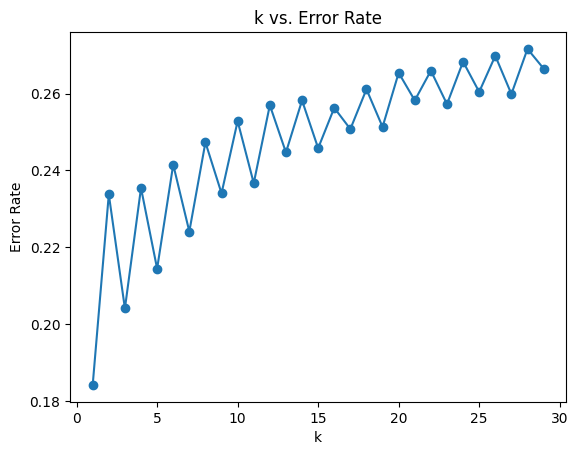

Optimal k: 1


In [267]:
error_rates = []
k_values = list(range(1, 30))  


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res, y_train_res)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

# Plot the error rates
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('k vs. Error Rate')
plt.show()

# Find the optimal k (elbow point)
optimal_k = k_values[error_rates.index(min(error_rates))]
print("Optimal k:", optimal_k)